In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [3]:
im_input = Image.open('/data/private_data/mxy_private/lowlight/ipynb/test/780.png')
# im_groundtruth = Image.open('/home/mist/lowlight/datasets/mit500/test/groundtruth/a4785.png')
im_input_array = np.array(im_input)/255
# im_groundtruth_array = np.array(im_groundtruth)/255


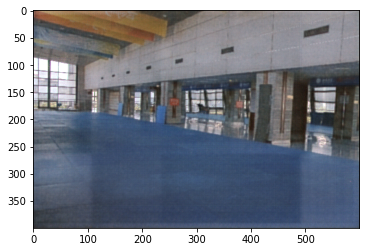

In [4]:
plt.imshow(im_input_array)


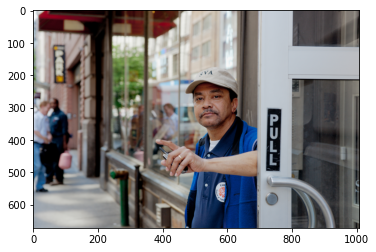

In [17]:
plt.imshow(im_groundtruth_array)

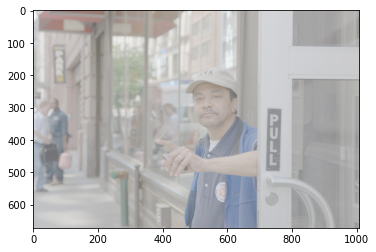

In [18]:
gamma = 0.2
gamma_array  = np.power(im_input_array , gamma)

#res = np.multiply(imR_array,im_array)
plt.imshow(gamma_array)


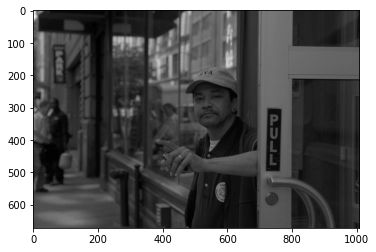

In [19]:
im_input_gray_array = im_input_array[:,:,0:1]*0.299 + im_input_array[:,:,1:2]*0.587 + im_input_array[:,:,2:3]*0.114
im_groundtruth_gray_array = im_groundtruth_array[:,:,0:1]*0.299 + im_groundtruth_array[:,:,1:2] *0.587 + im_groundtruth_array[:,:,2:3]*0.114
im_input_gray_array = 0.85*im_input_gray_array + 0.15*im_groundtruth_gray_array
plt.imshow(im_input_gray_array, cmap='gray')

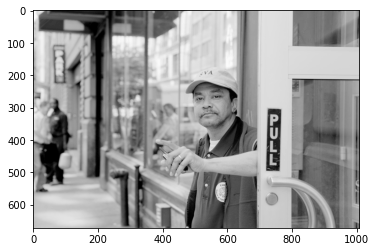

In [20]:

im_groundtruth_gray_array  = np.power(im_groundtruth_gray_array, 0.6)
plt.imshow(im_groundtruth_gray_array, cmap='gray')

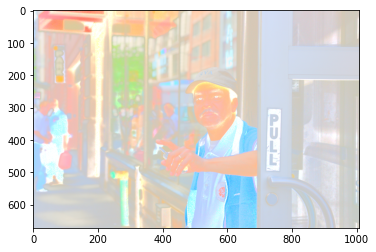

In [21]:
#print(im_input_gray_array.shape)
I_input_array = np.concatenate((im_input_gray_array, im_input_gray_array, im_input_gray_array), axis=2)
#print(I_input_array.shape)
R_input_array = im_input_array / I_input_array
R_input_array [np.isnan(R_input_array )] = 0
R_input_array = np.clip(R_input_array, 0, 1)
#print(R_input_array.shape)
plt.imshow(R_input_array)
#R_input_array
#print(im_input_gray_array)
#print(im_input_array / I_input_array)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


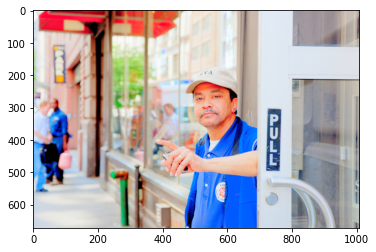

In [22]:
I_groundtruth_array = np.concatenate((im_groundtruth_gray_array, im_groundtruth_gray_array, im_groundtruth_gray_array), axis=2)
R_groundtruth_array = im_groundtruth_array / I_groundtruth_array
R_groundtruth_array[np.isnan(R_groundtruth_array )] = 0
#print(R_groundtruth_array.shape)
R_groundtruth_array_max = np.max(R_groundtruth_array, axis = 2)
R_groundtruth_array_max = np.clip(R_groundtruth_array_max, 1, 100000)
print(R_groundtruth_array_max)
R_groundtruth_array_max = np.expand_dims(R_groundtruth_array_max, 2)
norm_array = np.concatenate((R_groundtruth_array_max, R_groundtruth_array_max, R_groundtruth_array_max), axis=2)
R_groundtruth_array = R_groundtruth_array / norm_array
plt.imshow(R_groundtruth_array)
big_img = Image.fromarray(np.uint8(R_groundtruth_array*255))
big_img.save('test.png')

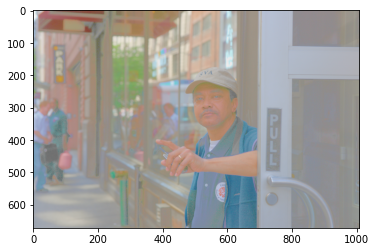

In [23]:
I_input_gamma_array  = np.power(I_input_array, gamma)

#res = np.multiply(imR_array,im_array)
plt.imshow(np.multiply(I_input_gamma_array, R_input_array))

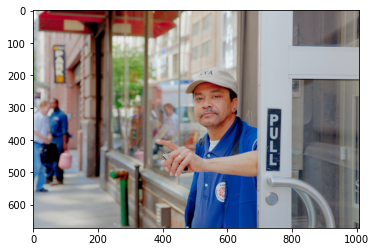

In [24]:
plt.imshow(np.multiply(I_input_gamma_array, R_groundtruth_array))

In [25]:
mix_im = R_groundtruth_array*0.5 + im_groundtruth_array*0.5
plt.imshow(mix_im)
big_img = Image.fromarray(np.uint8(mix_im*255))
big_img.save('test_mix.png')

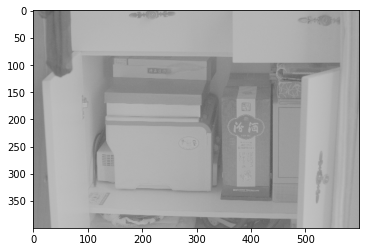

In [ ]:
plt.imshow(I_input_gamma_array)